Нуралиев Расим. Группа ПИ19-4

## Task 4

Задание 4. Задача максимизации прибыли производителя [1, 2 – гл.9]
Производственная функция (в ден. выражении) имеет вид Q(x, y) = Axa1 y
a2
, где x, y
– количества единиц первого и второго ресурсов. Стоимость единицы первого ресурса
– w1, второго – w2 (ден.ед.).
1. Найдите максимальную прибыль и оптимальный план.
2. В силу бюджетных ограничений на ресурсы может быть потрачено не более I
(ден.ед.). Найдите максимальную прибыль при наличии бюджетных ограничений и оптимальное для производителя сочетание (x, y) количеств используемых ресурсов.
3. Постройте пространственную модель функции прибыли. Постройте карту изоквант.
4. Найдите уравнение изокванты, на которой достигается максимум прибыли при наличии ограничений на издержки. Найдите уравнение изокосты, которая соответствует
ограничениям на издержки.
5. Покажите графически, что оптимальной комбинации ресурсов соответствует точка касания найденных изокванты и изокосты.


In [1]:
import numpy as np
from scipy.optimize import  LinearConstraint, Bounds, minimize 
import sympy as sym

from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
  

In [45]:
# Функция для минимизации
def U(values):
    x = values[0]
    y = values[1]
    return -(3*x**(5/7)*(y-7)**(5/7))


# Функция градиента
def gr(values):
    x = values[0]
    y = values[1]

    res = np.zeros_like(values)
    res[0] = -eval(str(U_func.diff(x_))) 
    res[1] = -eval(str(U_func.diff(y_)))
    
    return res


## Входные данные

In [46]:
x_, y_ = sym.symbols('x y')
U_func = 3*x_**(5/7)*(y_-7)**(5/7)
U_func

3*x**0.714285714285714*(y - 7)**0.714285714285714

In [47]:
p = 5

In [48]:
q = 8

In [49]:
I = 2336

## Вычисления функций предельнойполезности

In [50]:
display(U_func.diff(x_))

2.14285714285714*(y - 7)**0.714285714285714/x**0.285714285714286

In [51]:
display(U_func.diff(y_))

2.14285714285714*x**0.714285714285714/(y - 7)**0.285714285714286

In [52]:
# Предельные значения

x_min = 1
y_min = 7

x_max = np.inf
y_max = np.inf

## Поиск значений

In [56]:
linear_constraint = LinearConstraint ([p, q], -np.inf, I)
bounds = Bounds([x_min, y_min], [x_max, y_max])


x0 = np.array([10.0, 10.0])
res = minimize(U, x0, jac=gr, constraints=linear_constraint, bounds=bounds, options={'disp': True})

x_res = res.x[0]
y_res = res.x[1]


print(f"\nFound values {x_res = } {y_res = }\nFunctiong maximum value {-res.fun}")

Optimization terminated successfully    (Exit mode 0)
            Current function value: -5009.560434521075
            Iterations: 9
            Function evaluations: 20
            Gradient evaluations: 9

Found values x_res = 227.9999772906616 y_res = 149.50001431508642
Functiong maximum value 5009.560434521075


## Построение графика

Text(0.5, 0, 'U')

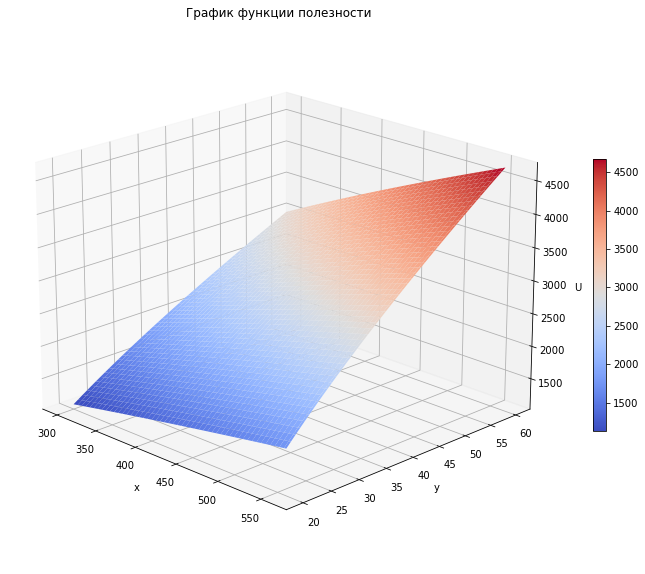

In [83]:
# Настраиваем 3D график
fig, ax = plt.subplots(figsize=(15,10), subplot_kw={"projection": "3d"})

# Задаем угол обзора
ax.view_init(20, -45)

# Создаем данные для графика
X = np.linspace(300, 560, 100)
Y = np.linspace(20, 60, 200)
X, Y = np.meshgrid(X, Y)
Z = -U(np.array([X,Y]))

# Рисуем поверхность
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)
fig.colorbar(surf, shrink=0.5)
ax.set_title('График функции полезности')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('U')

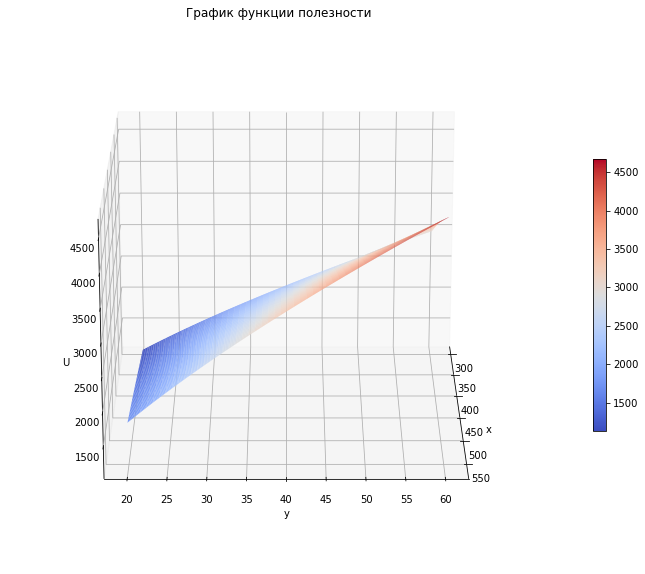

In [84]:
ax.view_init(20, 0)
fig

C:\Users\a0932\AppData\Local\Temp/ipykernel_44356/2162268392.py:20: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cs = ax.contour(X, Y, Z, colors='black', linewidth=1)


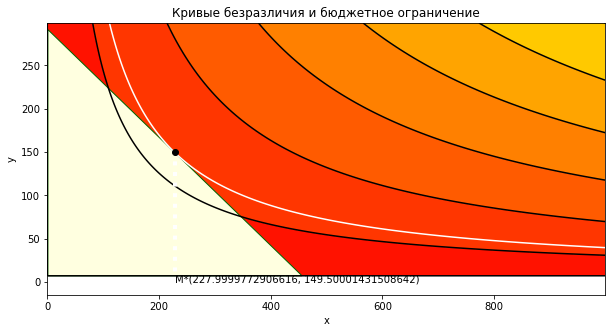

In [91]:
fig, ax = plt.subplots(figsize=(10,5))

X = np.arange(0, 1000, 1)
Y = np.arange(7, 300, 1)
X, Y = np.meshgrid(X, Y)
Z = -U(np.array([X,Y]))

ax.contourf(X, Y, Z, cmap='autumn')

adm = plt.Polygon([(x_min,y_min),(x_min, I/q-p*x_min/q),
                   (I/p-q*y_min/p, y_min)], facecolor='lightyellow', 
                  edgecolor='darkgreen', alpha = 1, linewidth=1)

ax.add_patch(adm)
ax.set_title('Кривые безразличия и бюджетное ограничение')
ax.set_xlabel('x')
ax.set_ylabel('y')

cs_m = ax.contour(X, Y, Z, levels=[-res.fun], colors='white')
cs = ax.contour(X, Y, Z, colors='black', linewidth=1)

plt.vlines(x=x_res, ymin=0, ymax=y_res, colors='white', ls=':', lw=4)
ax.plot(x_res, y_res, 'ko')
ax.text(res.x[0], 0, f"M*({x_res}, {y_res})")

# ax.clabel(cs)
# ax.clabel(cs_m)

plt.show()


#### 4) Найдите уравнение кривой безразличия, на которой находится потребитель в оптимальной точке.

In [94]:
res_4 = sym.Eq(U_func, -res.fun)
res_4

Eq(3*x**0.714285714285714*(y - 7)**0.714285714285714, 5009.56043452107)

#### 5) Определите норму замены второго товара первым в оптимальной точке.

In [95]:
grad = gr(res.x)
MRS = grad[0] / grad[1]
print('Норма замены второго товара первым MRS =', MRS)

Норма замены второго товара первым MRS = 0.6250001250369551


#### 6) Функция спроса

In [105]:
def demand(p):
    return 5000/(7*p)

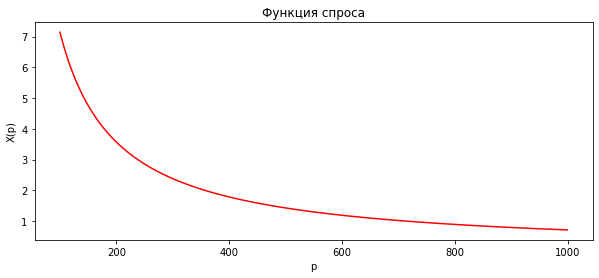

In [114]:
fig, ax = plt.subplots(figsize=(10
                                , 4))

P = np.arange(100, 1000, 1)
X = demand(P)

ax.plot(P, X, color='red')
ax.set_title('Функция спроса')
ax.set_xlabel('p')
ax.set_ylabel('X(p)')

plt.show()

In [122]:
el = sym.symbols('p')
E = demand(el).diff(el)
print('Эластичность спроса E =', E)
print('E =', eval(str(E)))

Эластичность спроса E = -5000/(7*p**2)
E = -28.571428571428573
